In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, roc_auc_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Live.csv')
data.shape

(7050, 16)

In [40]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [41]:
data.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [42]:
data.duplicated().sum()

51

In [43]:
data = data.iloc[:,:-4]
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [44]:
# Reason for Double Brackets

# data.columns: This expression returns an Index object, which acts like a list containing the names of all columns in the DataFrame. You can use integer indexing (like [0] or [-1]) to access individual column names.

# Selecting Multiple Columns: When you want to select multiple columns based on their integer indices, you need to provide a list of those indices. That's where the first pair of square brackets [] comes in. They are used to create a list containing the desired column indices, such as [-4, -1].

# Indexing data.columns: Now, you want to use this list of column indices to actually retrieve the corresponding column names from data.columns. To index the data.columns object with a list of integers, you need to enclose that list in another pair of square brackets. Hence the double brackets [[]].

# Analogy:

# Think of it like accessing elements from a nested list.


# my_list = [[1, 2, 3], [4, 5, 6]]
# Use code with caution
# To get the element 5, you would use my_list[1][1]. The first [1] selects the second sublist, and the second [1] selects the second element within that sublist.

# Similarly, data.columns[[-4, -1]] is essentially:

# [-4, -1]: Creating a list of desired column indices.
# data.columns[...]: Using this list to index (select) the corresponding column names from data.columns.

In [45]:
data.shape

(7050, 12)

In [46]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

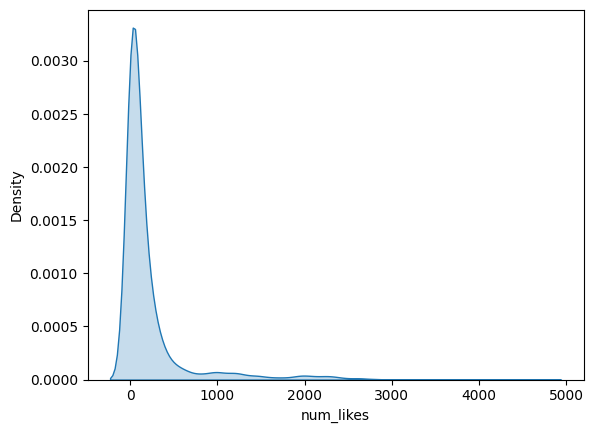

In [47]:
sns.kdeplot(data['num_likes'],fill = True)
plt.show()

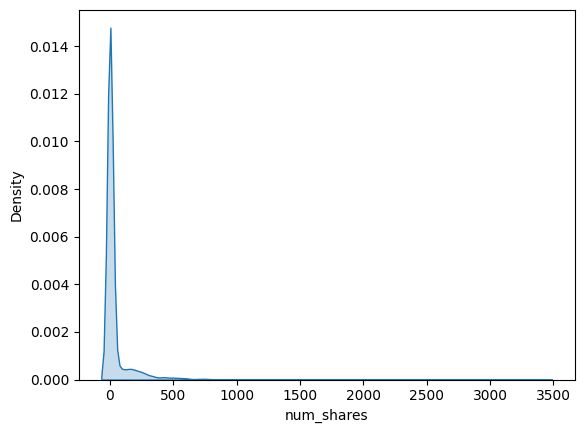

In [48]:
sns.kdeplot(data['num_shares'],fill = True)
plt.show()

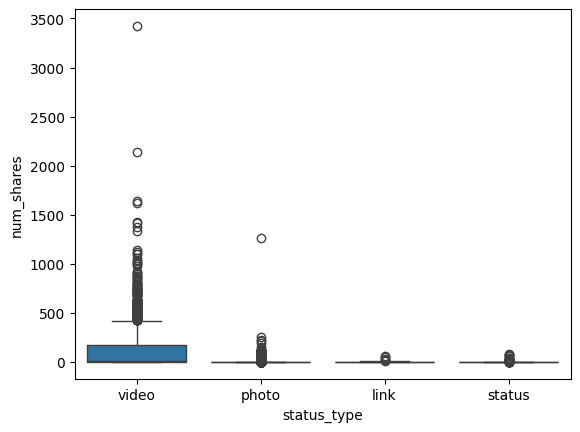

In [49]:
sns.boxplot(data = data, x = 'status_type', y = 'num_shares')
plt.show()

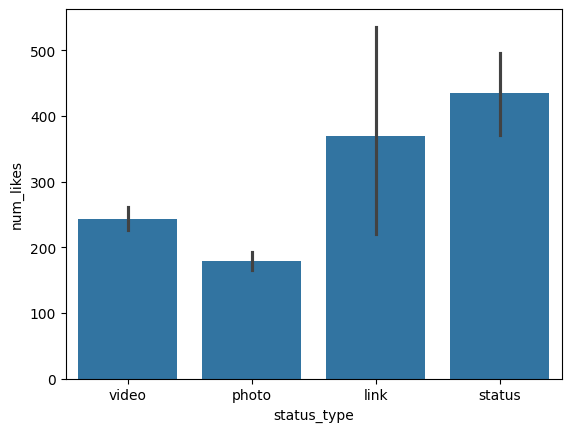

In [50]:
sns.barplot(data = data, x = 'status_type', y= 'num_likes')
plt.show()

In [51]:
data['status_type'] = data['status_type'].map({'video':1,'photo':2,'link':3,'status':4})
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,1,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,2,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,1,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,2,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,2,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [52]:
data.drop(['status_id', 'status_published'], axis = 1,inplace = True)
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,2,150,0,0,150,0,0,0,0,0
2,1,227,236,57,204,21,1,1,0,0
3,2,111,0,0,111,0,0,0,0,0
4,2,213,0,0,204,9,0,0,0,0


In [53]:
for cols in data.columns:
  print(cols,':', data[cols].unique())

status_type : [1 2 3 4]
num_reactions : [529 150 227 ... 558 570 415]
num_comments : [  512     0   236     6   614   453     1     9     2     4    11   100
   256   173   166    15     7    36    78   300    14     8   137   292
    72    39   181   210    12   456    60   235   444    21   255   136
   327   284   114    81   193    32   258    13   259   468   130   251
   247    89   341   316   368    76    63   171   461   540     3    10
    18    16    25   709  1979    17   145   116   157    46   120   486
     5   199    77   825   805   449    49   589   558    31   424   131
   525    24   491   633   588    20    23   417   355   564   110   605
   158   888   911   996   574    34    28  1381   524    19   462    40
   254   265   523   309    61    22   769    48    37   560   117   128
   427    54    95   266    75   165  6148   103   195    84  1201   147
   127    44   274  5498 19013  4661   432   383   169 20990    80    26
    27   186    33   102    93    30   

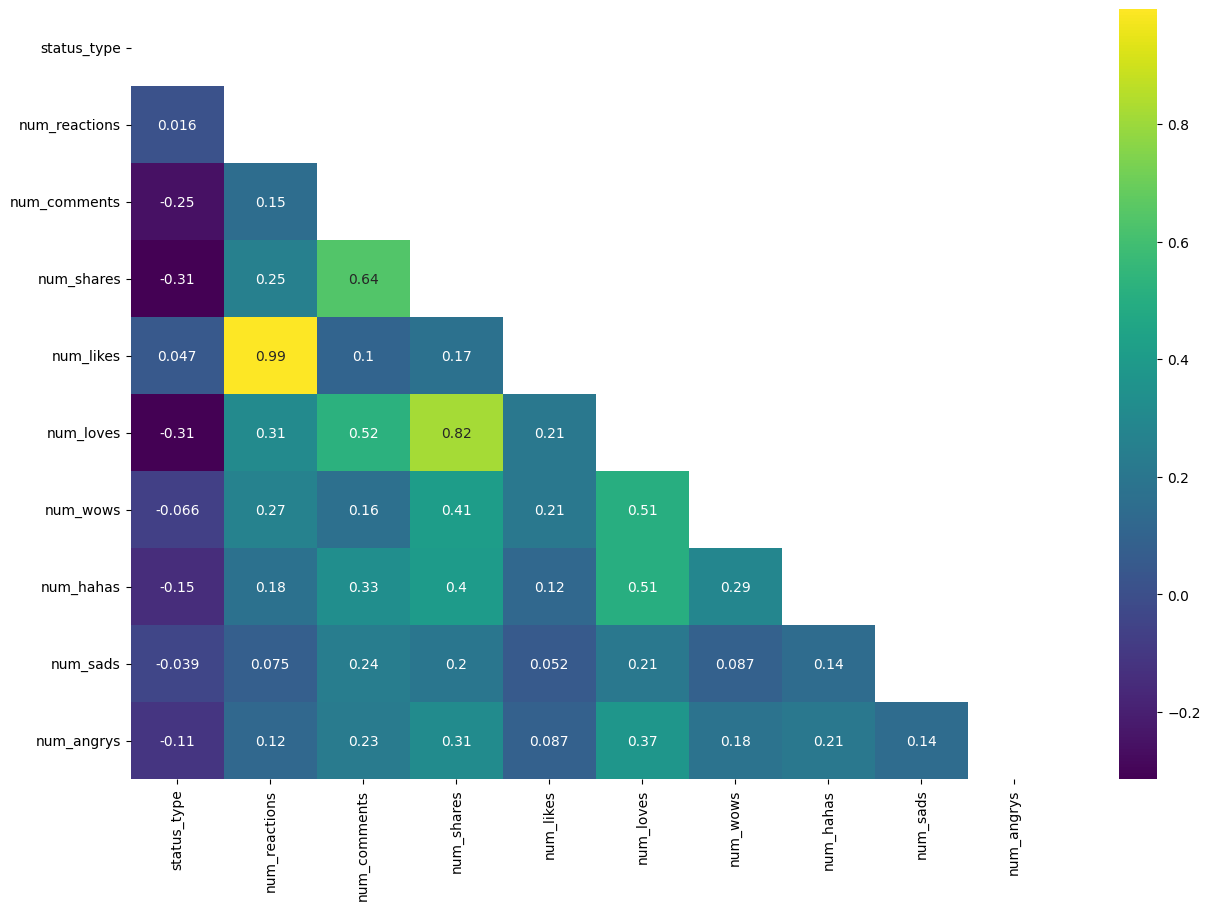

In [54]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True, cmap = 'viridis', mask = np.triu(data.corr()))
plt.show()

In [55]:
# splitting the data
x = data
y = data['status_type']

In [56]:
# Scaling the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)


In [57]:
x_scaled_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [60]:
for cols in x_scaled_df.columns:
  transformed, _ = stats.boxcox(data[cols][1:])
  data[cols] = transformed
  plt.figure(figsize = (5,5))
  sns.kdeplot(data[cols],fill = True)
  plt.show()

ValueError: Data must be positive.

Skipping Box-Cox transformation for column 'status_type' due to non-positive values.


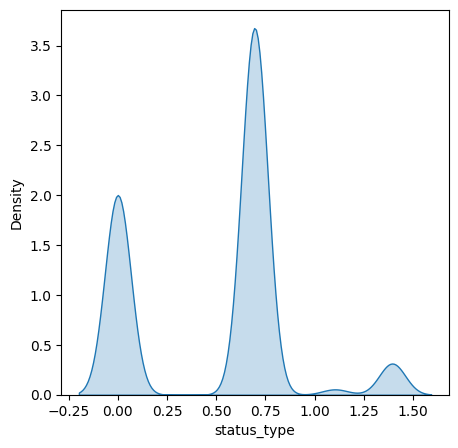

Skipping Box-Cox transformation for column 'num_reactions' due to non-positive values.


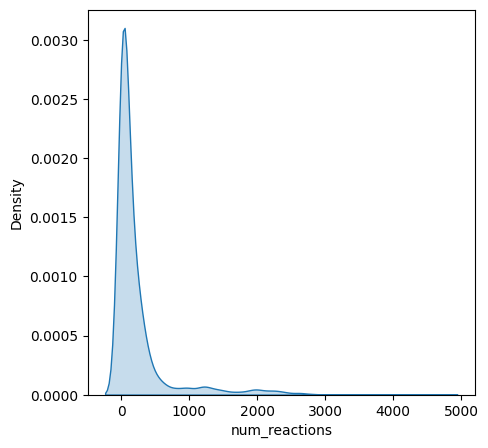

Skipping Box-Cox transformation for column 'num_comments' due to non-positive values.


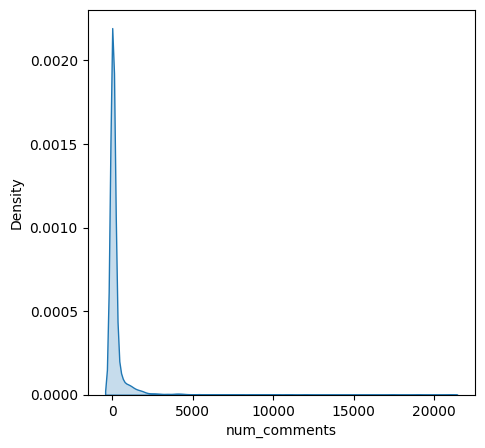

Skipping Box-Cox transformation for column 'num_shares' due to non-positive values.


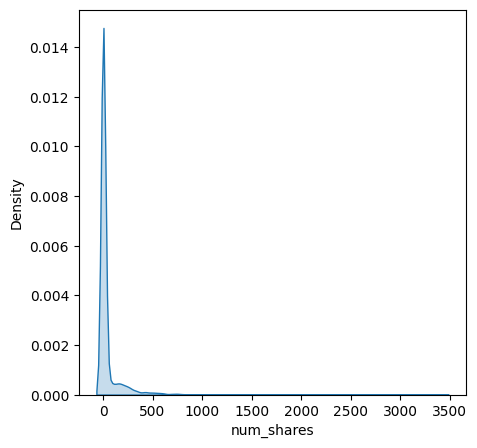

Skipping Box-Cox transformation for column 'num_likes' due to non-positive values.


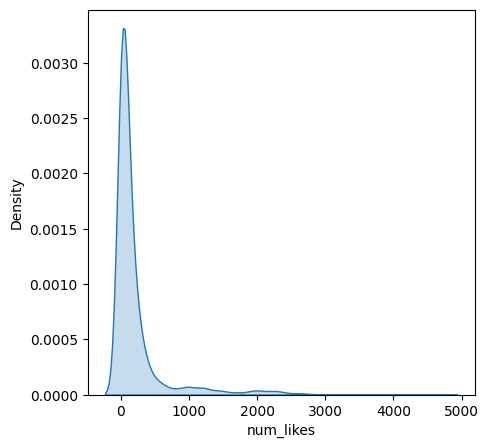

Skipping Box-Cox transformation for column 'num_loves' due to non-positive values.


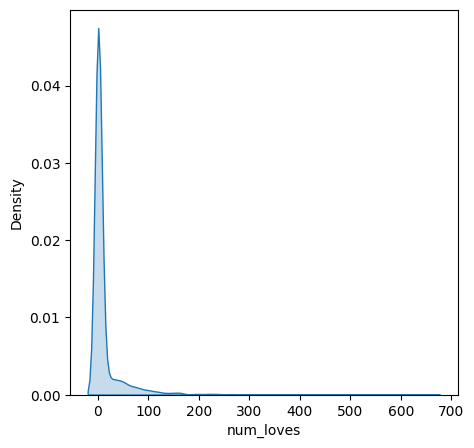

Skipping Box-Cox transformation for column 'num_wows' due to non-positive values.


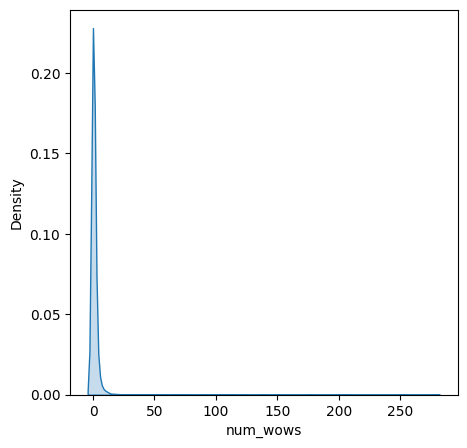

Skipping Box-Cox transformation for column 'num_hahas' due to non-positive values.


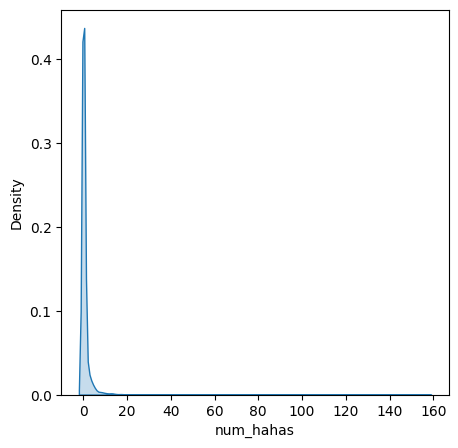

Skipping Box-Cox transformation for column 'num_sads' due to non-positive values.


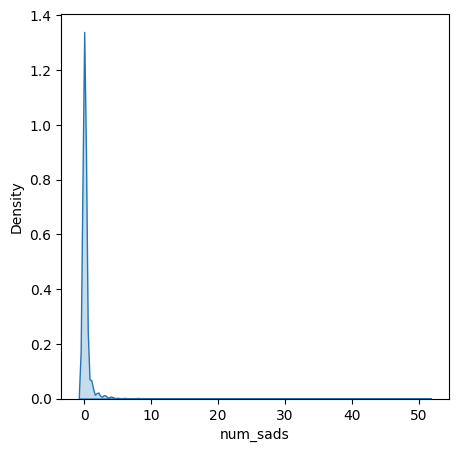

Skipping Box-Cox transformation for column 'num_angrys' due to non-positive values.


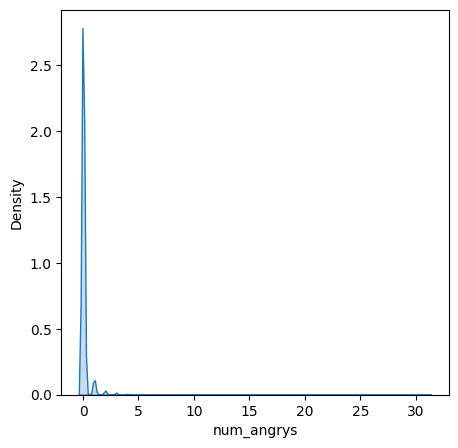

In [61]:
for cols in x_scaled_df.columns:
  # Adding a check for positive values before applying Box-Cox transformation
  if (data[cols] > 0).all():  # Check if all values in the column are positive
    transformed, _ = stats.boxcox(data[cols])
    data[cols] = transformed
  else:
    print(f"Skipping Box-Cox transformation for column '{cols}' due to non-positive values.")
  plt.figure(figsize=(5, 5))
  sns.kdeplot(data[cols], fill=True)
  plt.show()

In [63]:
# Clusterin model(KNN)
cs = []
for i in range(1, 10):
  KNN = KMeans(n_clusters = i , random_state = 42, max_iter = 300, n_init = 10)
  KNN.fit(x_scaled_df)
  cs.append(KNN.inertia_)
  labels = KNN.labels_
  correct_labels = sum(y == labels)
  # KNN.predict(y)
  print(f'Result: {correct_labels} out of {y.size} samples were correctly labeled.')
  print(f'Accuracy score: {correct_labels/y.size} for {i} number of clusters')



Result: 0 out of 7050 samples were correctly labeled.
Accuracy score: 0.0 for 1 number of clusters
Result: 2334 out of 7050 samples were correctly labeled.
Accuracy score: 0.33106382978723403 for 2 number of clusters
Result: 2334 out of 7050 samples were correctly labeled.
Accuracy score: 0.33106382978723403 for 3 number of clusters
Result: 2193 out of 7050 samples were correctly labeled.
Accuracy score: 0.31106382978723407 for 4 number of clusters
Result: 2151 out of 7050 samples were correctly labeled.
Accuracy score: 0.3051063829787234 for 5 number of clusters
Result: 2145 out of 7050 samples were correctly labeled.
Accuracy score: 0.30425531914893617 for 6 number of clusters
Result: 0 out of 7050 samples were correctly labeled.
Accuracy score: 0.0 for 7 number of clusters
Result: 1660 out of 7050 samples were correctly labeled.
Accuracy score: 0.23546099290780143 for 8 number of clusters
Result: 280 out of 7050 samples were correctly labeled.
Accuracy score: 0.03971631205673759 for

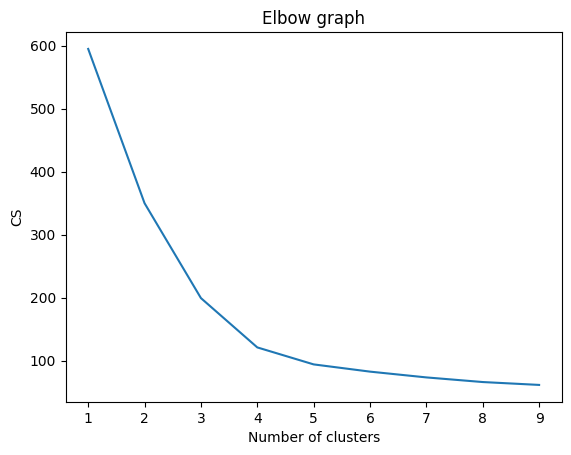

In [64]:
plt.plot(range(1,10),cs)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [65]:
KNN = KMeans(n_clusters = 4 , random_state = 42, max_iter = 300)
KNN.fit(x_scaled_df)

labels = KNN.labels_
correct_labels = sum(y==labels)
print(f'Result: {correct_labels} out of {y.size} smaples were correctly labeled')
print(f'Accuracy score: {round((correct_labels/y.size)*100,2)}')

Result: 2193 out of 7050 smaples were correctly labeled
Accuracy score: 31.11


In [66]:
KNN.inertia_

120.92620530023058

In [ ]:
KNN = KMeans(n_clusters = 2, random_state = 42, max_iter = 300)
KNN.fit(x_scaled_df)

labels = KNN.labels_
correct_labels = sum(y==labels)
print(f'Result: {correct_labels} out of {y.size} smaples were correctly labeled')
print(f'Accuracy score: {round((correct_labels/y.size)*100,2)}')

Result: 2334 out of 7050 smaples were correctly labeled
Accuracy score: 33.11


In [ ]:
KNN.inertia_

349.7870239279034